In [6]:
import sys
print(sys.executable)

c:\Users\User\Desktop\Quick-Draw-DL\.venv\Scripts\python.exe


In [5]:
%pip install -r requirements.txt

     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 12.2 MB/s eta 0:03:42
     ---------------------------------------- 0.0/2.7 GB 11.9 MB/s eta 0:03:48
     ---------------------------------------- 0.0/2.7 GB 11.8 MB/s eta 0:03:49
     ---------------------------------------- 0.0/2.7 GB 12.0 MB/s eta 0:03:45
     ---------------------------------------- 0.0/2.7 GB 11.9 MB/s eta 0:03:47
     ---------------------------------------- 0.0/2.7 GB 11.9 MB/s eta 0:03:47
     ---------------------------------------- 0.0/2.7 GB 11.8 MB/s eta 0:03:48
     ---------------------------------------- 0.0/2.7 GB 11.8 MB/s eta 0:03:48
     ---------------------------------------- 0.0/2.7 GB 11.9 MB/s eta 0:03:46
     ---------------------------------------- 0.0/2.7 GB 11.8 MB/s eta 0:03:47
     ---------------------------------------- 0.0/2.7 GB 11.8 MB/s eta 0:03:47
     ---------------------------------------- 0.0/2.7 GB 11.

  You can safely remove it manually.


# 변환할 파일 목록 조회
- [(경로, 분류명)]

In [1]:
import numpy as np
from glob import glob
from PIL import Image

In [2]:
files = [(path, path.replace("data_original\\", "").replace(".npy", "")) for path in glob("data_original/*")]

In [3]:
# 분류 정보 처리
categories = [category for _, category in files]
categories

np.save('category.npy', np.array(categories))

In [5]:
# data_original에 있는 이미지 (28x28x1) -> 224x224x3으로 변환해서 data/에 저장
for path, _ in files:
    print('-' * 10, path, '변환 시작', '-' * 10)
    data = np.load(path)
    print(data.shape, path)
    data = data[:15000].reshape(-1, 28, 28)
    total = data.shape[0]
    resized_data = np.zeros((total, 224, 224), dtype=np.uint8)
    for i in range(total):
        img = np.array(Image.fromarray(data[i]).resize((224, 224)))
        resized_data[i] = img
    
    np.save(path.replace("_original", ""), resized_data[:13000])
    np.save(path.replace("_original", "_val"), resized_data[13000:])
    print('-' * 10, path, '변환 종료', '-' * 10)

---------- data_original\aircraft carrier.npy 변환 시작 ----------
(116504, 784) data_original\aircraft carrier.npy
---------- data_original\aircraft carrier.npy 변환 종료 ----------
---------- data_original\airplane.npy 변환 시작 ----------
(151623, 784) data_original\airplane.npy
---------- data_original\airplane.npy 변환 종료 ----------
---------- data_original\alarm clock.npy 변환 시작 ----------
(123399, 784) data_original\alarm clock.npy
---------- data_original\alarm clock.npy 변환 종료 ----------
---------- data_original\ambulance.npy 변환 시작 ----------
(148004, 784) data_original\ambulance.npy
---------- data_original\ambulance.npy 변환 종료 ----------
---------- data_original\angel.npy 변환 시작 ----------
(149736, 784) data_original\angel.npy
---------- data_original\angel.npy 변환 종료 ----------
---------- data_original\animal migration.npy 변환 시작 ----------
(137847, 784) data_original\animal migration.npy
---------- data_original\animal migration.npy 변환 종료 ----------
---------- data_original\ant.npy 변환 시작 ----

In [7]:
# 변환 이미지 테스트
items = np.load("data/aircraft carrier.npy")
items.shape

(13000, 224, 224)

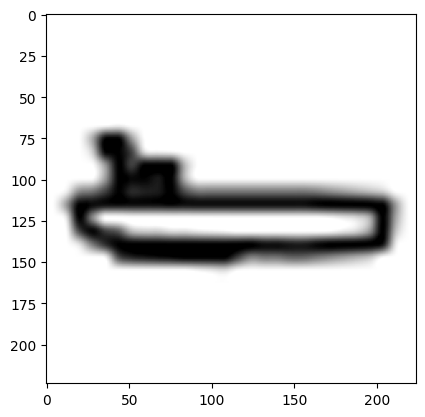

In [8]:
import matplotlib.pyplot as plt
plt.imshow(items[0], cmap='gray_r')
plt.show()